# Problem Statement

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = [12,8]

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

# Roadmap
* Univariate Analysis                            
* Bivariate Analysis - Here we try to find the pattern with the TGT.                              
* Missing values
* Outliers Identification
* Feature Engineering
* Scaling/Transformation

**Model Building**
* Base Model - You must have your Base Model. In classification, the base model is 0s and in Regression, its average.

* Logistic Regression Model followed by Tree based Models.

Note: All the Models are submitted using KFold Cross Validation approach.

* Paramater Tuning should be done for TOP 3 models only. Once that is done, I will build the Stacking Model(Ensemble methods)

Exceptions: LightGBM, CatBoost, ExtraTreesClassifier.

In [7]:
# Univariate Analysis

combined = pd.concat([train,test],ignore_index = True)

In [8]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
combined.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
num_cols = combined.select_dtypes(include = np.number).columns
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

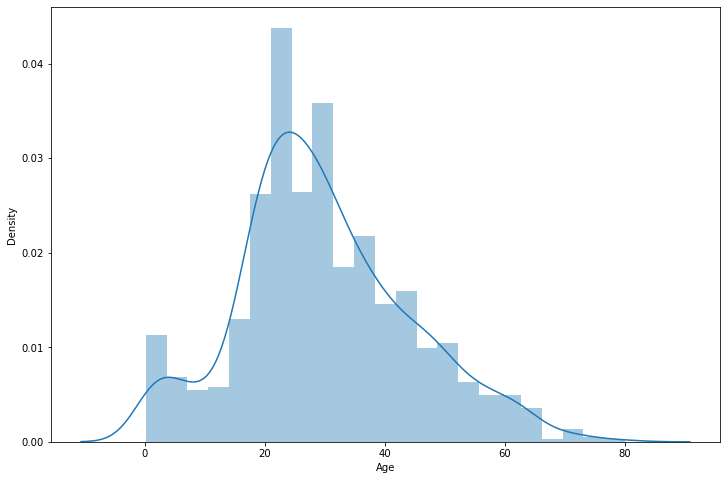

In [11]:
# Distplot for age

sns.distplot(combined['Age'])
plt.show()
# Age is skewed meaning there were a lot of people above 30

In [12]:
combined['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

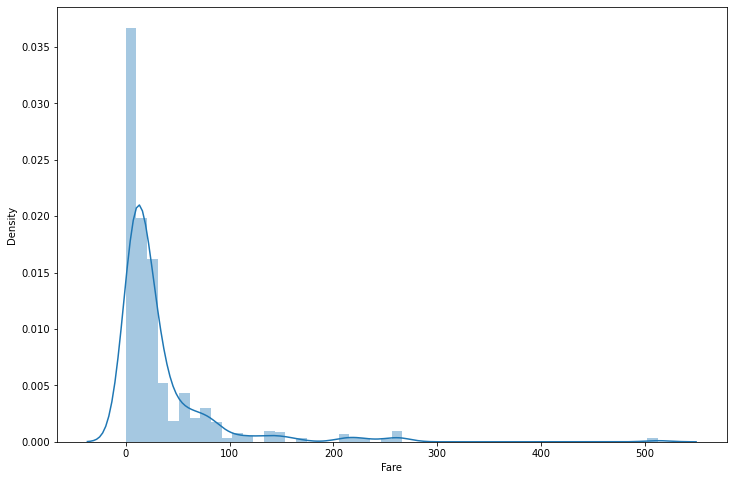

In [13]:
#Plot for Fare

sns.distplot(combined['Fare'])
plt.show()

#Fare is highly skewed

In [14]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


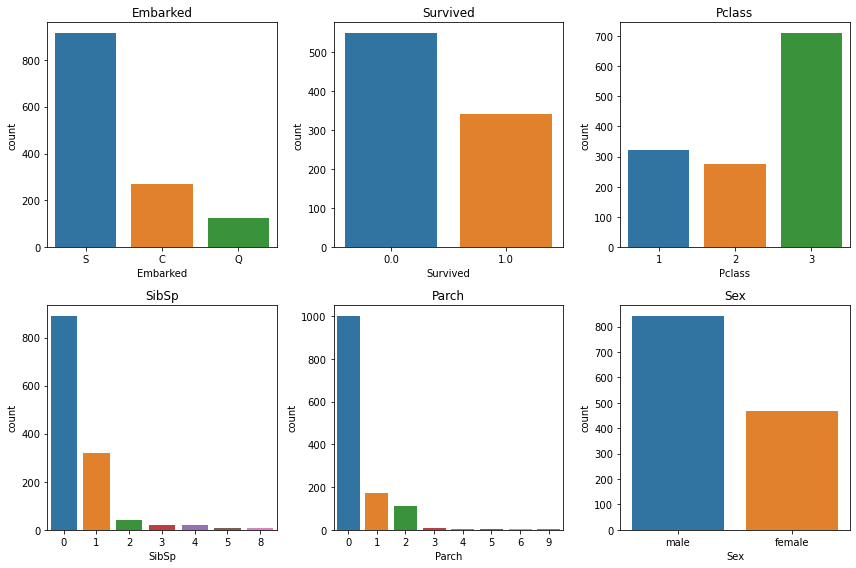

In [15]:
cols = ['Embarked','Survived','Pclass','SibSp','Parch','Sex']

nrows = 2
ncols = 3
iterator =1

for i in cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined.loc[:,i])
    plt.title(i)
    iterator+=1

plt.tight_layout()
plt.show()

# Most of the people embarked from Southampton, mostly males, were class 3 passengers and travelled alone 
# Unfortunately did not survive.

# Base model - All died.

In [16]:
submission = pd.DataFrame({'PassengerID':test.PassengerId,
                          'Survived':0})
submission.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [17]:
submission.to_csv('basemodel.csv', index = False)

In [18]:
# All Females survived
my_dict = {'male':0,'female':1}


In [19]:
submission = pd.DataFrame({'PassengerID':test.PassengerId,
                          'Survived':test.Sex.map(my_dict)})


In [20]:
submission.to_csv('AllFemales.csv', index = False)

In [21]:
submission.head()

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Bivariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='Age'>

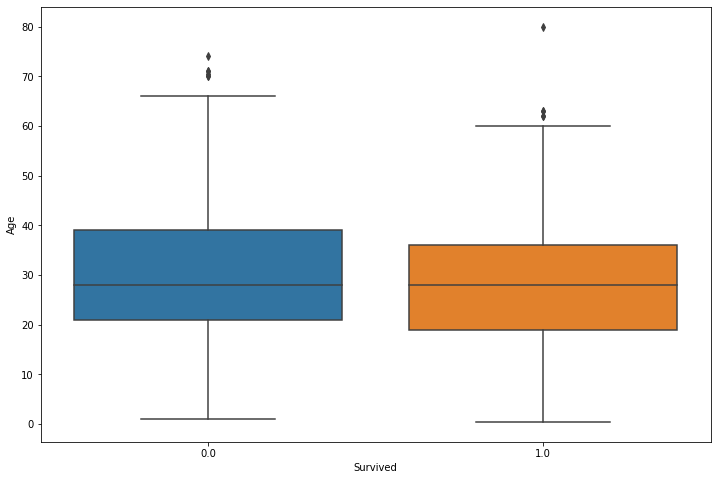

In [22]:
#Num vs Num
# Age vs survival
sns.boxplot(x = 'Survived', y ='Age', data= combined)

# people having age gretaer than 30 have high survival rate

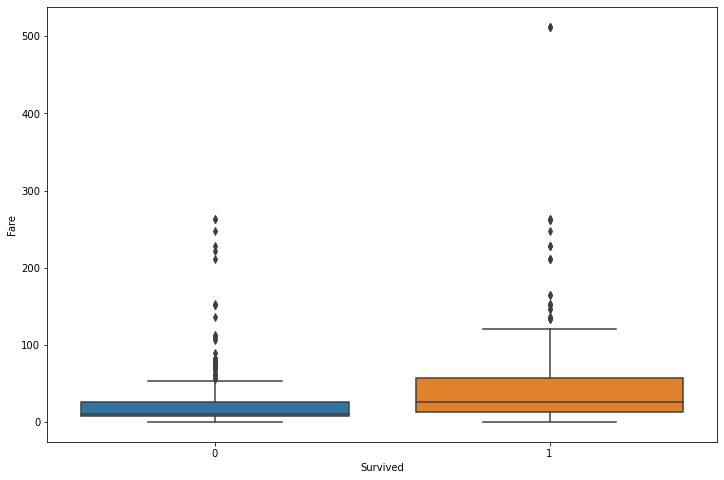

In [23]:
# Fare vs Survived
sns.boxplot(x = 'Survived', y ='Fare', data=train)
plt.show()

# People who survived paid more

In [24]:
train.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [25]:
# Cat vs Cat

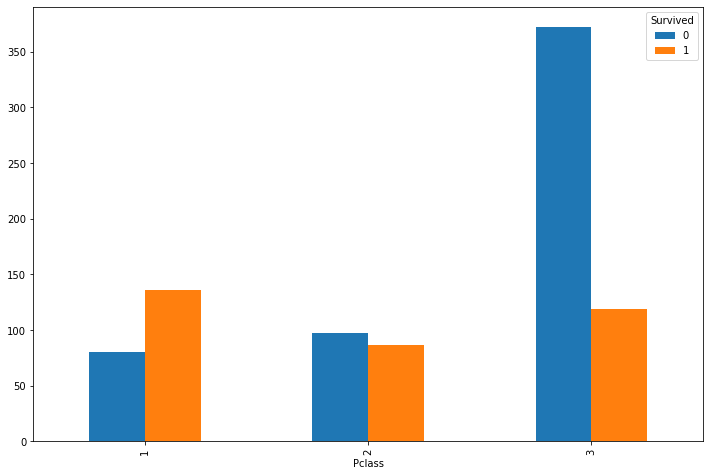

In [26]:
pd.crosstab(train['Pclass'], train['Survived']).plot(kind='bar')
plt.show()

#class 1 and class 2 have higher survival rate than class 3

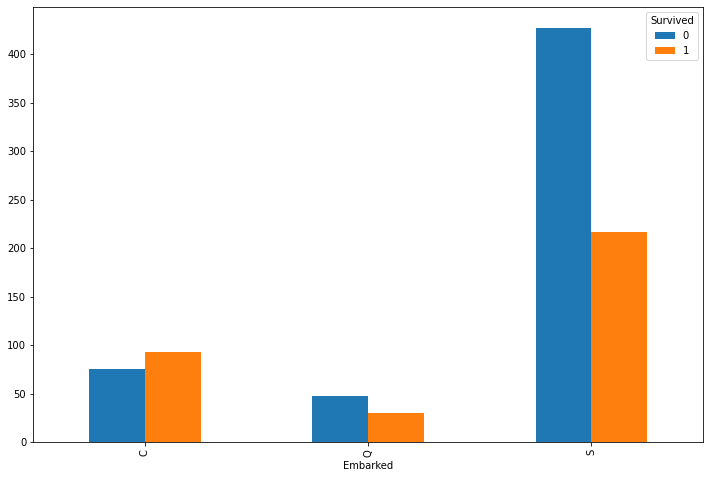

In [27]:
#Embarked vs survival
pd.crosstab(train['Embarked'],train['Survived']).plot(kind='bar')
plt.show()

# Cherbourg and then southampton people have higher survival percentage

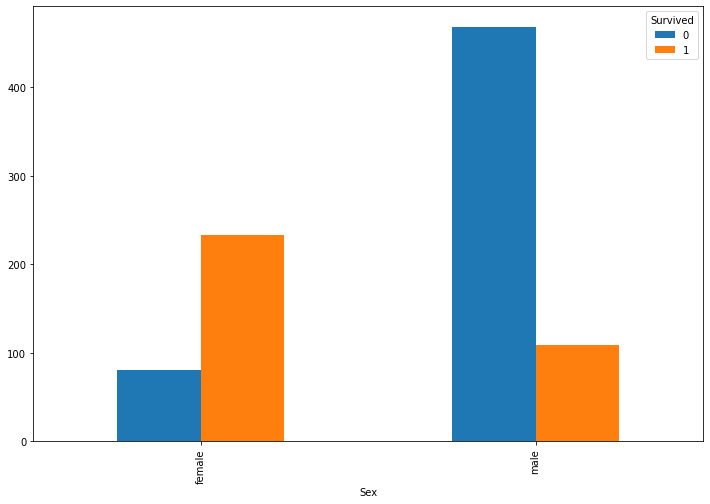

In [28]:
# Gender vs Survival
pd.crosstab(train['Sex'],train['Survived']).plot(kind='bar')
plt.show()

#High survival rate of Females when compared to males

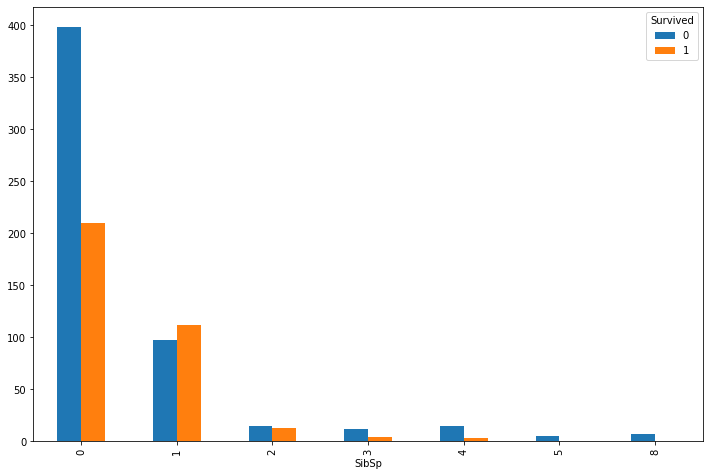

In [29]:
# Sibsp vs Survived
pd.crosstab(train['SibSp'],train['Survived']).plot(kind='bar')
plt.show()

# Solo Travellers and couples have higher chances of survival


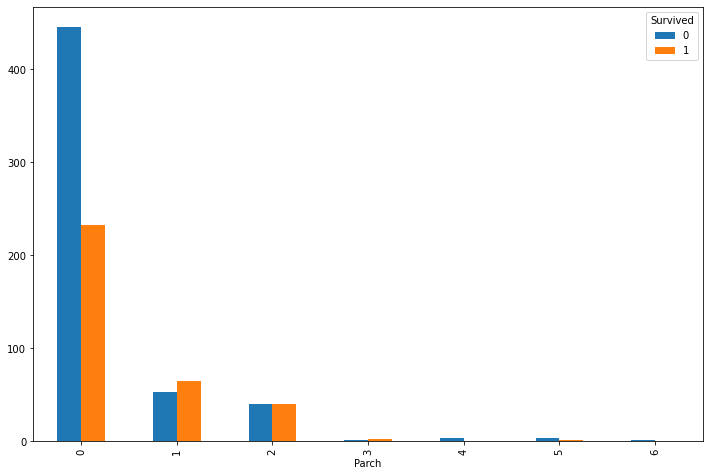

In [30]:
# Parch and survived
pd.crosstab(train['Parch'],train['Survived']).plot(kind='bar')
plt.show()

# Smaller family had a higher likelihood of survival

<AxesSubplot:xlabel='Cabin'>

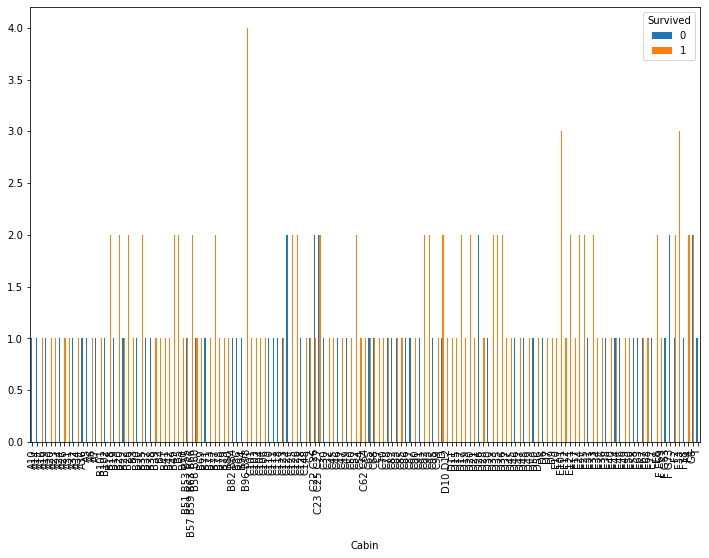

In [31]:
pd.crosstab(train['Cabin'],train['Survived']).plot(kind='bar')

In [32]:
# inference from the bivariate analysis :

# People from Class 1, coming from cherbourg/Southampton, paid fare greater than 26 dollars, female, travelling solo or with 
# 1 person/kid(s) with an age of 30 or more has a high likelihood pf survival.

# Missing values

In [33]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [34]:
combined.shape

(1309, 12)

In [35]:
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [36]:
cabins = ['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [37]:
def cabin_available(x):
    if x in cabins:
        return('Available')
    else:
        return('Not Available')

In [38]:
combined.Cabin.apply(cabin_available)

0       Not Available
1           Available
2       Not Available
3           Available
4       Not Available
            ...      
1304    Not Available
1305        Available
1306    Not Available
1307    Not Available
1308    Not Available
Name: Cabin, Length: 1309, dtype: object

In [39]:
combined['Cabin'] = combined.Cabin.apply(cabin_available)

In [40]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Available,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Available,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Available,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Available,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Available,S


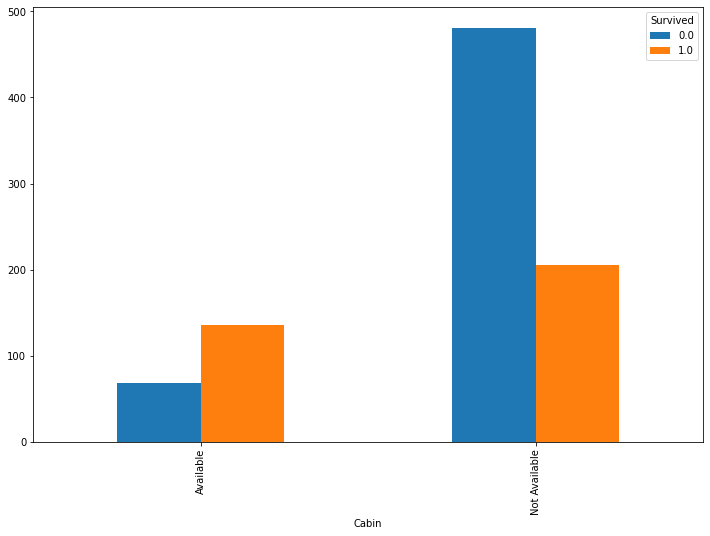

In [41]:
pd.crosstab(combined['Cabin'],combined['Survived']).plot(kind='bar')
plt.show()

In [42]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Available,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Available,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Available,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Available,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Available,S


In [43]:
# Extracting the salutation
combined.Name.str.split(', ', expand= True)[1].str.split('.',expand=True)[0].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

# Use Lambda function to split the above column

In [44]:
f_names = combined.Name.str.split(', ',expand=True)[1]

In [45]:
f_names.str.split('.',expand=True)[0].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [46]:
combined['Titles'] = f_names.str.split('.',expand=True)[0]

In [47]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Available,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Available,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Available,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Available,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Available,S,Mr


In [48]:
combined.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [49]:
titles_ignore = [ 'Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

def mytitles(x):
    if x in titles_ignore:
        return('others')
    else:
        return(x)



combined['Titles'] = combined.Titles.apply(mytitles)

In [50]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Available,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Available,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Available,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Available,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Available,S,Mr


In [51]:
combined.groupby('Titles')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Titles,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


In [52]:
combined.loc[(combined['Titles']=='Master') & (combined['Age'].isnull()), 'Age']=4

combined.loc[(combined['Titles']=='Miss') & (combined['Age'].isnull()), 'Age']=22

combined.loc[(combined['Titles']=='Mr') & (combined['Age'].isnull()), 'Age']=29

combined.loc[(combined['Titles']=='Mrs') & (combined['Age'].isnull()), 'Age']=35

combined.loc[(combined['Titles']=='Ms') & (combined['Age'].isnull()), 'Age']=28

combined.loc[(combined['Titles']=='others') & (combined['Age'].isnull()), 'Age']=45

In [53]:
combined['Age'].isnull().sum()

0

In [54]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived    418
Fare          1
Embarked      2
dtype: int64

In [55]:
#fare

combined[combined['Ticket']=='3701']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Not Available,S,Mr


In [56]:
# Titles = Mr, Pclass = 3, and Cabin Not Allocated

combined.loc[(combined['Titles']=='Mr') & (combined['Pclass']==3) & (combined['Cabin']=='Not Available'),'Fare'].describe()

count    439.000000
mean      11.167623
std       10.074809
min        0.000000
25%        7.750000
50%        7.895800
75%        8.662500
max       69.550000
Name: Fare, dtype: float64

In [57]:
combined.loc[combined['Fare'].isnull(),'Fare']=7.8958

In [58]:
# Embarked

combined.loc[combined.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,Available,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,Available,NaN,Mrs


<AxesSubplot:xlabel='Titles'>

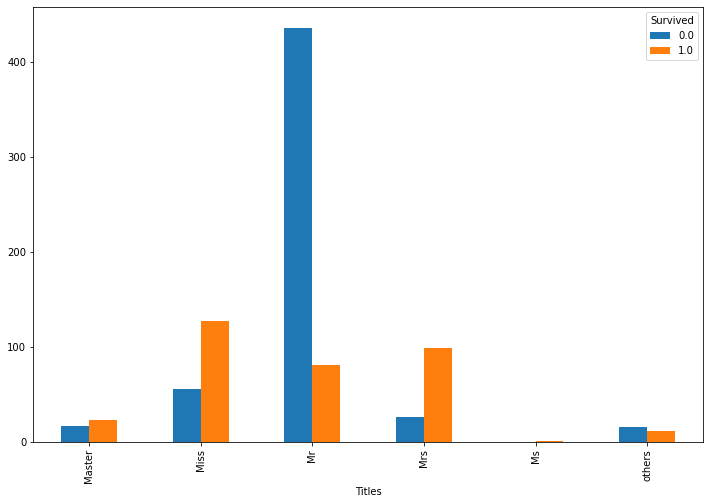

In [59]:
pd.crosstab(combined['Titles'],combined['Survived']).plot(kind='bar')

In [60]:
combined.loc[(combined['Pclass']==1)&(combined['Fare']>80), 'Embarked'].mode()

0    C
dtype: object

In [61]:
combined.loc[combined['Embarked'].isnull(),'Embarked']='C'

In [62]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived    418
dtype: int64

In [63]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Available,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Available,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Available,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Available,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Available,S,Mr


# Feature Engineering

In [64]:
# Family ( combining SibSp and Parch ) 

combined['Family'] = combined['SibSp'].astype('int') + combined['Parch'].astype('int') +1

In [65]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Available,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Available,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Available,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Available,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Available,S,Mr,1


<AxesSubplot:xlabel='Family'>

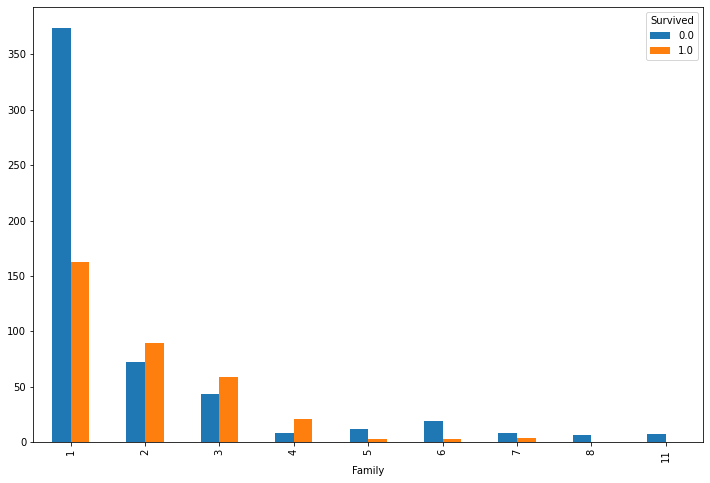

In [66]:
#pattern of family with survival

pd.crosstab(combined['Family'],combined['Survived']).plot(kind='bar')

In [67]:
# Family cat

def fam(x):
    if x==1:
        return('Single')
    elif x==2:
        return('Couples')
    elif x==3:
        return('Small Family')
    else:
        return('Large Family')

In [68]:
combined['Family_cat'] = combined['Family'].apply(fam)

In [70]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Family,Family_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Available,S,Mr,2,Couples
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Available,C,Mrs,2,Couples
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Available,S,Miss,1,Single
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Available,S,Mrs,2,Couples
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Available,S,Mr,1,Single


<AxesSubplot:xlabel='Family_cat'>

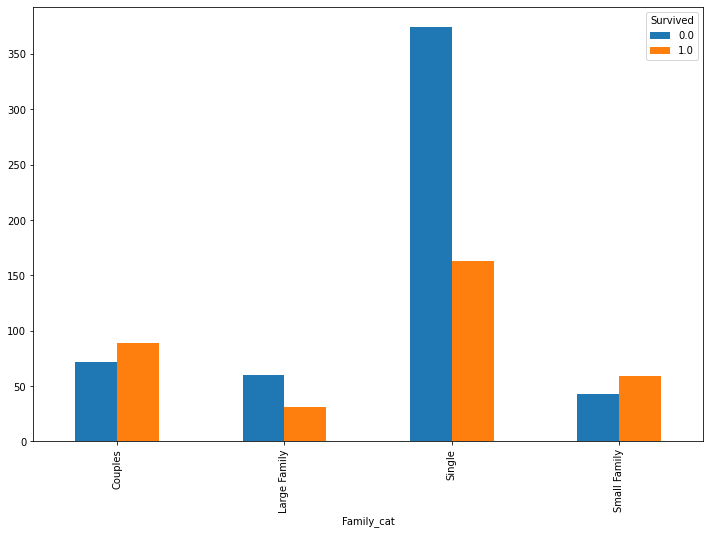

In [71]:
pd.crosstab(combined['Family_cat'],combined['Survived']).plot(kind='bar')

In [72]:
# Dropping all redundant columns

new = combined.drop(['Name','PassengerId','SibSp','Parch','Ticket'],axis=1)
new.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Titles,Family,Family_cat
0,0.0,3,male,22.0,7.2500,Not Available,S,Mr,2,Couples
1,1.0,1,female,38.0,71.2833,Available,C,Mrs,2,Couples
2,1.0,3,female,26.0,7.9250,Not Available,S,Miss,1,Single
3,1.0,1,female,35.0,53.1000,Available,S,Mrs,2,Couples
4,0.0,3,male,35.0,8.0500,Not Available,S,Mr,1,Single


# Split the data into train and test


In [86]:
train.shape, test.shape

((891, 12), (418, 11))

In [74]:
new.shape

(1309, 10)

In [78]:
#train set
newtrain = new.iloc[0:train.shape[0],]

In [79]:
newtrain.shape

(891, 10)

In [83]:
#test set
newtest = new.iloc[train.shape[0]:,]

In [85]:
newtest.shape

(418, 10)

In [87]:
newtrain.shape, newtest.shape

((891, 10), (418, 10))

In [88]:
newtest = newtest.drop('Survived',axis=1)

In [89]:
newtest.shape

(418, 9)

# Statistical Analysis

* To find if variables are going well with target or not
* cat vs cat - chi2_contingency

In [91]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    object 
 6   Embarked    891 non-null    object 
 7   Titles      891 non-null    object 
 8   Family      891 non-null    int32  
 9   Family_cat  891 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 66.3+ KB


In [92]:
newtrain.head(1)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Titles,Family,Family_cat
0,0.0,3,male,22.0,7.25,Not Available,S,Mr,2,Couples


In [94]:
# Chi Square Test
# Ho: That the predictor is Independent or not
# In other words, predictor and target are not related
# Ha: Ho is false


cols = ['Embarked', 'Pclass', 'Sex', 'Cabin', 'Titles', 'Family', 'Family_cat']

newtrain['Survived'] = newtrain.Survived.astype(int)


In [96]:
import scipy.stats as stats

for i in cols:
    tbl = pd.crosstab(newtrain.loc[:, i],newtrain.Survived)
    teststats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
    print('Pvalue for',i,'is',np.round(pvalue, 5))

Pvalue for Embarked is 0.0
Pvalue for Pclass is 0.0
Pvalue for Sex is 0.0
Pvalue for Cabin is 0.0
Pvalue for Titles is 0.0
Pvalue for Family is 0.0
Pvalue for Family_cat is 0.0


In [97]:
# Two sample Independent Ttest

cols = ['Age','Fare']

for i in cols:
    zero = newtrain.loc[newtrain.Survived==0, i]
    one = newtrain.loc[newtrain.Survived==1, i]
    
    teststats, pvalue = stats.ttest_ind(zero, one)
    print(pvalue)

0.031852659048203356
6.120189341924198e-15


# Model Building

* Logistic Regression
* Random Forest
* Gradient Boosting
* XGBoost
* LightGBM

In [101]:
X = newtrain.drop('Survived',axis=1)
y = newtrain.Survived

In [102]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Titles,Family,Family_cat
0,3,male,22.0,7.2500,Not Available,S,Mr,2,Couples
1,1,female,38.0,71.2833,Available,C,Mrs,2,Couples
2,3,female,26.0,7.9250,Not Available,S,Miss,1,Single
3,1,female,35.0,53.1000,Available,S,Mrs,2,Couples
4,3,male,35.0,8.0500,Not Available,S,Mr,1,Single


In [103]:
X = pd.get_dummies(X, drop_first=True)
newtest = pd.get_dummies(newtest, drop_first=True)

In [105]:
X.shape

(891, 16)

In [106]:
newtest.shape

(418, 16)

In [107]:
X.head()

,Pclass,Age,Fare,Family,Sex_male,Cabin_Not Available,Embarked_Q,Embarked_S,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Ms,Titles_others,Family_cat_Large Family,Family_cat_Single,Family_cat_Small Family
0,3,22.0,7.2500,2,1,1,0,1,0,1,0,0,0,0,0,0
1,1,38.0,71.2833,2,0,0,0,0,0,0,1,0,0,0,0,0
2,3,26.0,7.9250,1,0,1,0,1,1,0,0,0,0,0,1,0
3,1,35.0,53.1000,2,0,0,0,1,0,0,1,0,0,0,0,0
4,3,35.0,8.0500,1,1,1,0,1,0,1,0,0,0,0,1,0


In [100]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

In [108]:
# Initiate the Machines for learning

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

lg = LogisticRegression()

pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lg.fit(xtrain, ytrain).predict(newtest))

In [112]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)

In [113]:
finalpred

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [115]:
submission['Survived'] = finalpred

In [119]:
submission.to_csv('LogisticModel.csv',index= False) #76.794

In [118]:
cd

C:\Users\lokes


In [120]:
# Random Forest

rf = RandomForestClassifier()

pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(rf.fit(xtrain, ytrain).predict(newtest))

In [121]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)
submission['Survived']=finalpred
submission.to_csv('RFModel.csv', index = False)  #74.162

In [122]:
#Gradient boosting
gbm = GradientBoostingClassifier()

pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(gbm.fit(xtrain, ytrain).predict(newtest))

In [123]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)
submission['Survived']=finalpred
submission.to_csv('GradientBoostmodel.csv', index = False)    #77.033

In [124]:
! pip install lightgbm

In [125]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [130]:
#LGBM
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

lgbm = LGBMClassifier()

pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lgbm.fit(xtrain, ytrain).predict(newtest))

In [131]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)
submission['Survived']=finalpred
submission.to_csv('LGBM.csv', index = False)

In [132]:
#XGBM
xgb = XGBClassifier()

pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(xgb.fit(xtrain, ytrain).predict(newtest))
    

In [133]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)
submission['Survived']=finalpred
submission.to_csv('XGBoost.csv', index = False)

# Parameter tuning of GBM

In [135]:
from sklearn.model_selection import GridSearchCV

params = [{'loss':['deviance','exponential'],
           'n_estimators':[100,200,500,1000],
           'min_samples_split':[2,4,6,8],
           'max_depth':[2,4,6,8]}]

gbm = GradientBoostingClassifier()
grid = GridSearchCV(estimator=gbm, param_grid=params, cv=5)
grid.fit(X,y)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'loss': ['deviance', 'exponential'],
                          'max_depth': [2, 4, 6, 8],
                          'min_samples_split': [2, 4, 6, 8],
                          'n_estimators': [100, 200, 500, 1000]}])

In [137]:
grid.best_params_

{'loss': 'deviance',
 'max_depth': 2,
 'min_samples_split': 8,
 'n_estimators': 1000}

# Stacking Classifier model

In [138]:
from sklearn.ensemble import StackingClassifier



In [141]:
basemodels = [('lg',lg), ('lgbm', lgbm)]
finalmodel = GradientBoostingClassifier(loss='deviance',
                                        max_depth = 2,
                                        min_samples_split=8,
                                        n_estimators = 1000)

stack = StackingClassifier(estimators = basemodels,
                           final_estimator = finalmodel,
                           cv =5)

pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(stack.fit(xtrain, ytrain).predict(newtest))
    

In [142]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)
submission['Survived']=finalpred
submission.to_csv('StackingClassifier.csv', index = False)  # 77.751

In [143]:
# Parameter tuning of XGboost

params = [{'n_estimators':[100,200,500,1000],
           'max_depth':[2,4,6,8],
           'min_samples_split':[2,4,6,8]}]

xgb = XGBClassifier()
grid = GridSearchCV(estimator=xgb, param_grid=params, cv=5)
grid.fit(X,y)

[16:40:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "m

[16:40:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "m

[16:40:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "m

[16:40:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:40:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "m

[16:41:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "m

[16:41:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "m

[16:41:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:41:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "m

[16:42:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:42:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:42:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:42:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:42:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "m

KeyboardInterrupt: 

In [ ]:
xgb = XGBClassifier()

pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(xgb.fit(xtrain, ytrain).predict(newtest))
    